In [ ]:
from google.colab import drive
ROOT = "/content/drive"  
drive.mount(ROOT)  
%cd "/content/drive/MyDrive/PFE_PIMM/"
%ls

Mounted at /content/drive
/content/drive/MyDrive/PFE_PIMM
 batch_labeling.ipynb       labels                     Porosity_detection/
'Copie de labeling.ipynb'   LICENSE                    README.md
 ct_scan/                   line_to_continuum.mat      registration.ipynb
 Defect_detection/          meltpool_bitmap/           Tomo8.png
 extracting.ipynb           photo8.png                 tomo_labels/
 labeling.ipynb             Porosity_classification/   visualisation.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# I. Cleaning dataset
Cleaning process is done by

*   Extacting relevent information : 3D locations (Xg-Yg-Zg) 

*   and size(Volmarch and spherosity) of each porosity 
Eliminating noises 


Piece 3 : (original stack 4253)
4224-4253 then 1-297




In [ ]:
num_slice_th = 416*12
num_slice_reel = 3926

def get_layer(slice, num_slice_reel):
  layer_pd = [i for i in reversed(range(88,417))]
  layer_ct = [i for i in range(num_slice_reel,0,-12)]

  for i,_ in enumerate(layer_ct):
    if (slice > layer_ct[i]) and (slice <= layer_ct[i-1]):
      if i == len(layer_pd):
        return None
      else:
        return layer_pd[i]

In [ ]:
def map_max(x, max_slice, max_layer):
  return int((x) * (max_layer) / (max_slice)) + 1

def map_minmax(x, in_min, in_max, out_min, out_max):
  return int((x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)

def get_layer_v2 (x) :
  x = map_minmax(x,0,4245+1,1,416)
  return x

def get_stack(x, max_stack) : 
  return max_stack - (416 - x)*12 


def get_layer(x, max_stack) : 
  return 416 - (max_stack - x)/12

In [ ]:
def get_stack_8(x) : 
  return 4250 - (416 - x)*12 

def get_layer_8(x) : 
  return 416 - (4250 - x)/12

# Part 8
get_layer_8(2005)


228.91666666666666

In [4]:
def get_stack_9(x) : 
  return 4255 - (416 - x)*12 

def get_layer_9(x) : 
  return 416 - (4255 - x)/12

# Part 8
get_layer_9(4090)

402.25

In [ ]:
# Part 1
get_layer(622,4360)
get_stack(120, 4360)
# Part 2 
get_layer(1511,4369)
#get_stack(120, 4370)


177.83333333333334

In [ ]:
df= pd.read_csv('tomo_labels/res.dat', delimiter=" ")
df = df[['xg', 'yg', 'zg', 'volpix','volmarch', 'sphericity']]
df = df.sort_values('zg', ascending=False)
df['zg'] = df['zg'] + 30
df['numLayer'] = df['zg'].apply(get_layer_8, args=())
df.numLayer = df.numLayer.astype(int)

# df = df[ df["volpix"] != df["volpix"].max()]
# df = df[ df["volpix"] < 4000]
df = df[ df["volpix"] > 150]
df = df[ df["volpix"] < 1e4]

In [ ]:
new_df = df[['xg', 'yg', 'numLayer']]
new_df = new_df[ new_df["numLayer"] > 87]


In [ ]:
!pwd

/content/drive/My Drive/PFE_PIMM


In [ ]:
new_df.describe().loc[['count','max','min','mean']]
new_df.to_csv('labels')

NameError: ignored

# II. Computing indicators and porosity level


In [ ]:
from google.colab import data_table
data_table.DataTable(df)

,xg,yg,zg,volpix,volmarch,sphericity,numLayer
1772,233.484230,866.474954,4208.938776,539,531.604095,0.874562,412
1773,1012.420074,604.877323,4208.903346,269,260.520773,0.719094,412
1756,110.316038,438.165094,4108.707547,212,205.999936,0.825522,404
1746,127.275000,686.281250,4048.862500,160,153.770793,0.772081,399
1728,252.278008,205.427386,3943.788382,241,234.729115,0.798975,390
...,...,...,...,...,...,...,...
14,123.389068,623.135048,37.109325,311,297.294940,0.445858,64
2,450.562791,133.647176,36.106977,1505,1494.874799,0.579050,64
23,516.012048,526.271084,35.656627,332,323.749925,0.686314,64
18,134.819204,657.865917,35.623702,1156,1137.395576,0.393891,64


In [ ]:


sample_pores_list = [1328, 1395,1514,1527,1675]
sample = df.loc[sample_pores_list]

print(sample.to_latex(index=False))

pore1 = df.loc[1328]  # 725 * 0.241
pore3 = df.loc[1395] # 1297
pore6 = df.loc[1514] # 2204 * 0.160
pore7 = df.loc[1527] # 2314 * 0.082

# sample1 = df.loc[14494]
# sample2 = df.loc[14084]
# sample3 = df.loc[12142]
# sample3p = df.loc[12146]
# sample1752 = df.loc[11081]



\begin{tabular}{rrrrrrr}
\toprule
         xg &          yg &           zg &  volpix &     volmarch &  sphericity &  numLayer \\
\midrule
 271.475263 &  711.229061 &   728.220101 &    2567 &  2558.020481 &    0.507279 &        72 \\
 540.319888 &  637.917927 &  1297.154062 &    3570 &  3555.693872 &    0.432756 &       127 \\
 621.623953 &  619.005585 &  2203.498914 &    3223 &  3216.509665 &    0.371253 &       216 \\
 425.344363 &  557.459559 &  2313.703431 &     816 &   808.499856 &    0.669791 &       227 \\
 657.121212 &  511.454545 &  3377.469697 &      66 &    60.729133 &    0.757744 &       331 \\
\bottomrule
\end{tabular}



In [ ]:
from scipy.spatial.distance import pdist

def dist(df):
  return sum(pdist(df.values, 'euclid'))

vol_layer = 8691600.00


for i in range(88,417) :
  dt = df[['xg','yg']][df['numLayer'] == i]
  if dist(dt)==0 : print(i)

88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341


In [ ]:
# occurrence frequency
mu1 = pd.DataFrame(df.pivot_table(index=['numLayer'], aggfunc='size')).rename(columns = {0:'mu1'})
mu1_norm = (mu1-mu1.mean())/mu1.std()

# propotion of affected zone 
mu2 = pd.DataFrame(df.groupby('numLayer')['volmarch'].sum().div(vol_layer)).rename(columns = {'volmarch':'mu2'})
mu2_norm = (mu2-mu2.mean())/mu2.std()

# average distance between pores
mu1_serie = df.pivot_table(index=['numLayer'], aggfunc='size')
mu3 = pd.DataFrame(df.groupby('numLayer')[['xg','yg']].apply(lambda x: dist(x)).div(mu1_serie)).rename(columns = {0:'mu3'})
mu3_norm = (mu3-mu3.mean())/mu3.std()

# porosity level
mu = pd.DataFrame(mu2_norm['mu2'].mul(mu1_norm['mu1']).div(mu3_norm['mu3'])).rename(columns = {0:'mu'})

# mu = mu['mu'].apply(lambda x: x*900*900)
# mu[mu == np.inf] = 1

# normalised porosity level

normalised_mu = (mu-mu.min())/(mu.max()-mu.min())
normalised_mu_V2 = (mu-mu.mean())/mu.std()


In [ ]:
new_df = pd.concat([mu1, mu2, mu3,normalised_mu], axis=1)
data_table.DataTable(new_df)

,mu1,mu2,mu3,mu
numLayer,,,,
1,12,0.000669,2019.607207,0.629296
2,8,0.001173,1894.691823,0.765530
3,3,0.000073,295.603808,0.365240
4,8,0.000756,1554.982539,0.602424
5,5,0.000775,1061.017521,0.507374
...,...,...,...,...
396,1,0.000007,0.000000,0.001399
399,1,0.000024,0.000000,0.014188
406,1,0.000006,0.000000,0.000758


# III. Plot and Visualisation 
## 1. Change coordinate system (optional)

In [ ]:
df['xg'] = df['xg'] - 550
df['yg'] = df['yg'] - 550
df.head()

,xg,yg,zg,volpix,volmarch,sphericity,numLayer
1772,-316.515770,316.474954,4178.938776,539,531.604095,0.874562,409
1773,462.420074,54.877323,4178.903346,269,260.520773,0.719094,409
1770,-449.316901,-41.795775,4162.732394,142,134.937462,0.686311,407
1766,329.433333,312.650000,4152.483333,60,55.229143,0.772731,406
1756,-439.683962,-111.834906,4078.707547,212,205.999936,0.825522,399


### 2. Histogramme
#### Consentration of defects with respects to its size

In [ ]:
df[df]

ValueError: ignored

In [ ]:
# plot the dataset, referencing dataframe column names
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(df).mark_bar().encode(
  x=alt.X('volmarch', bin=True),
  y='count()',
)

alt.Chart(...)

### 2. Visualisation


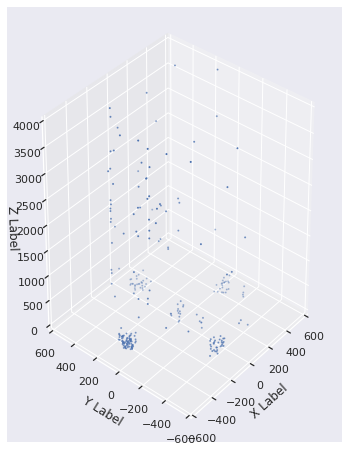

In [ ]:
xg = df['xg']
yg = df['yg']
zg = df['zg']

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111,projection='3d')

ax.set_xlim(-600,600)
ax.set_ylim(-600,600)
ax.set_zlim(0,4000)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(xg, yg, zg, s=1)


ax.view_init(30,220)
plt.show()

In [ ]:
df[(df.volpix >2100) &(df.volpix >2500) ]
df[df.numLayer == 225]

,xg,yg,zg,volpix,sphericity,numLayer
808,983.393921,402.439392,1646.439453,66.0,0.584194,225
805,118.052597,425.215729,1645.973511,2795.0,0.698946,225
807,663.159973,107.040001,1645.000000,25.0,0.475744,225
809,895.000000,413.600006,1644.199951,5.0,0.562359,225
804,186.288284,281.900909,1636.567627,111.0,0.617963,225


In [ ]:
df[df['volpix'] == df["volpix"].max()]

,xg,yg,zg,volpix,volmarch,sphericity,numLayer
936,925.915771,804.78241,1919.686157,2813.0,2807.985596,0.634484,248


In [ ]:
from scipy.spatial.distance import cdist

df1 = df[df['numLayer'] == 92][["xg","yg"]]
print(df1)

cdist(df1, df1, 'euclid')

            xg          yg
31  965.580017  581.466675
27  320.225220  947.007568
30  208.055557  254.833328


array([[  0.        , 741.68926063, 824.94402861],
       [741.68926063,   0.        , 701.20411569],
       [824.94402861, 701.20411569,   0.        ]])

In [ ]:
import itertools

for i, j in itertools.combinations(df1.index, 2):
    d_ij = np.linalg.norm(df1.loc[i] - df1.loc[j])

In [ ]:
d_ij

701.204115685963